# **Credit Score Classification Project**

Importing the libraries into Python.

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Reading train.csv file and looking at the table.

In [81]:
df = pd.read_csv("train.csv")
print(df.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


Looking at the infomation about the columns of the dataset.

In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Checking the dataset to see if there is any null values or not.

In [83]:
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


Figuring out how many people have Good, Standard, or Poor credit score.

In [84]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

# **Data Exploration**

Exploring the relationship between the target columns and the features.

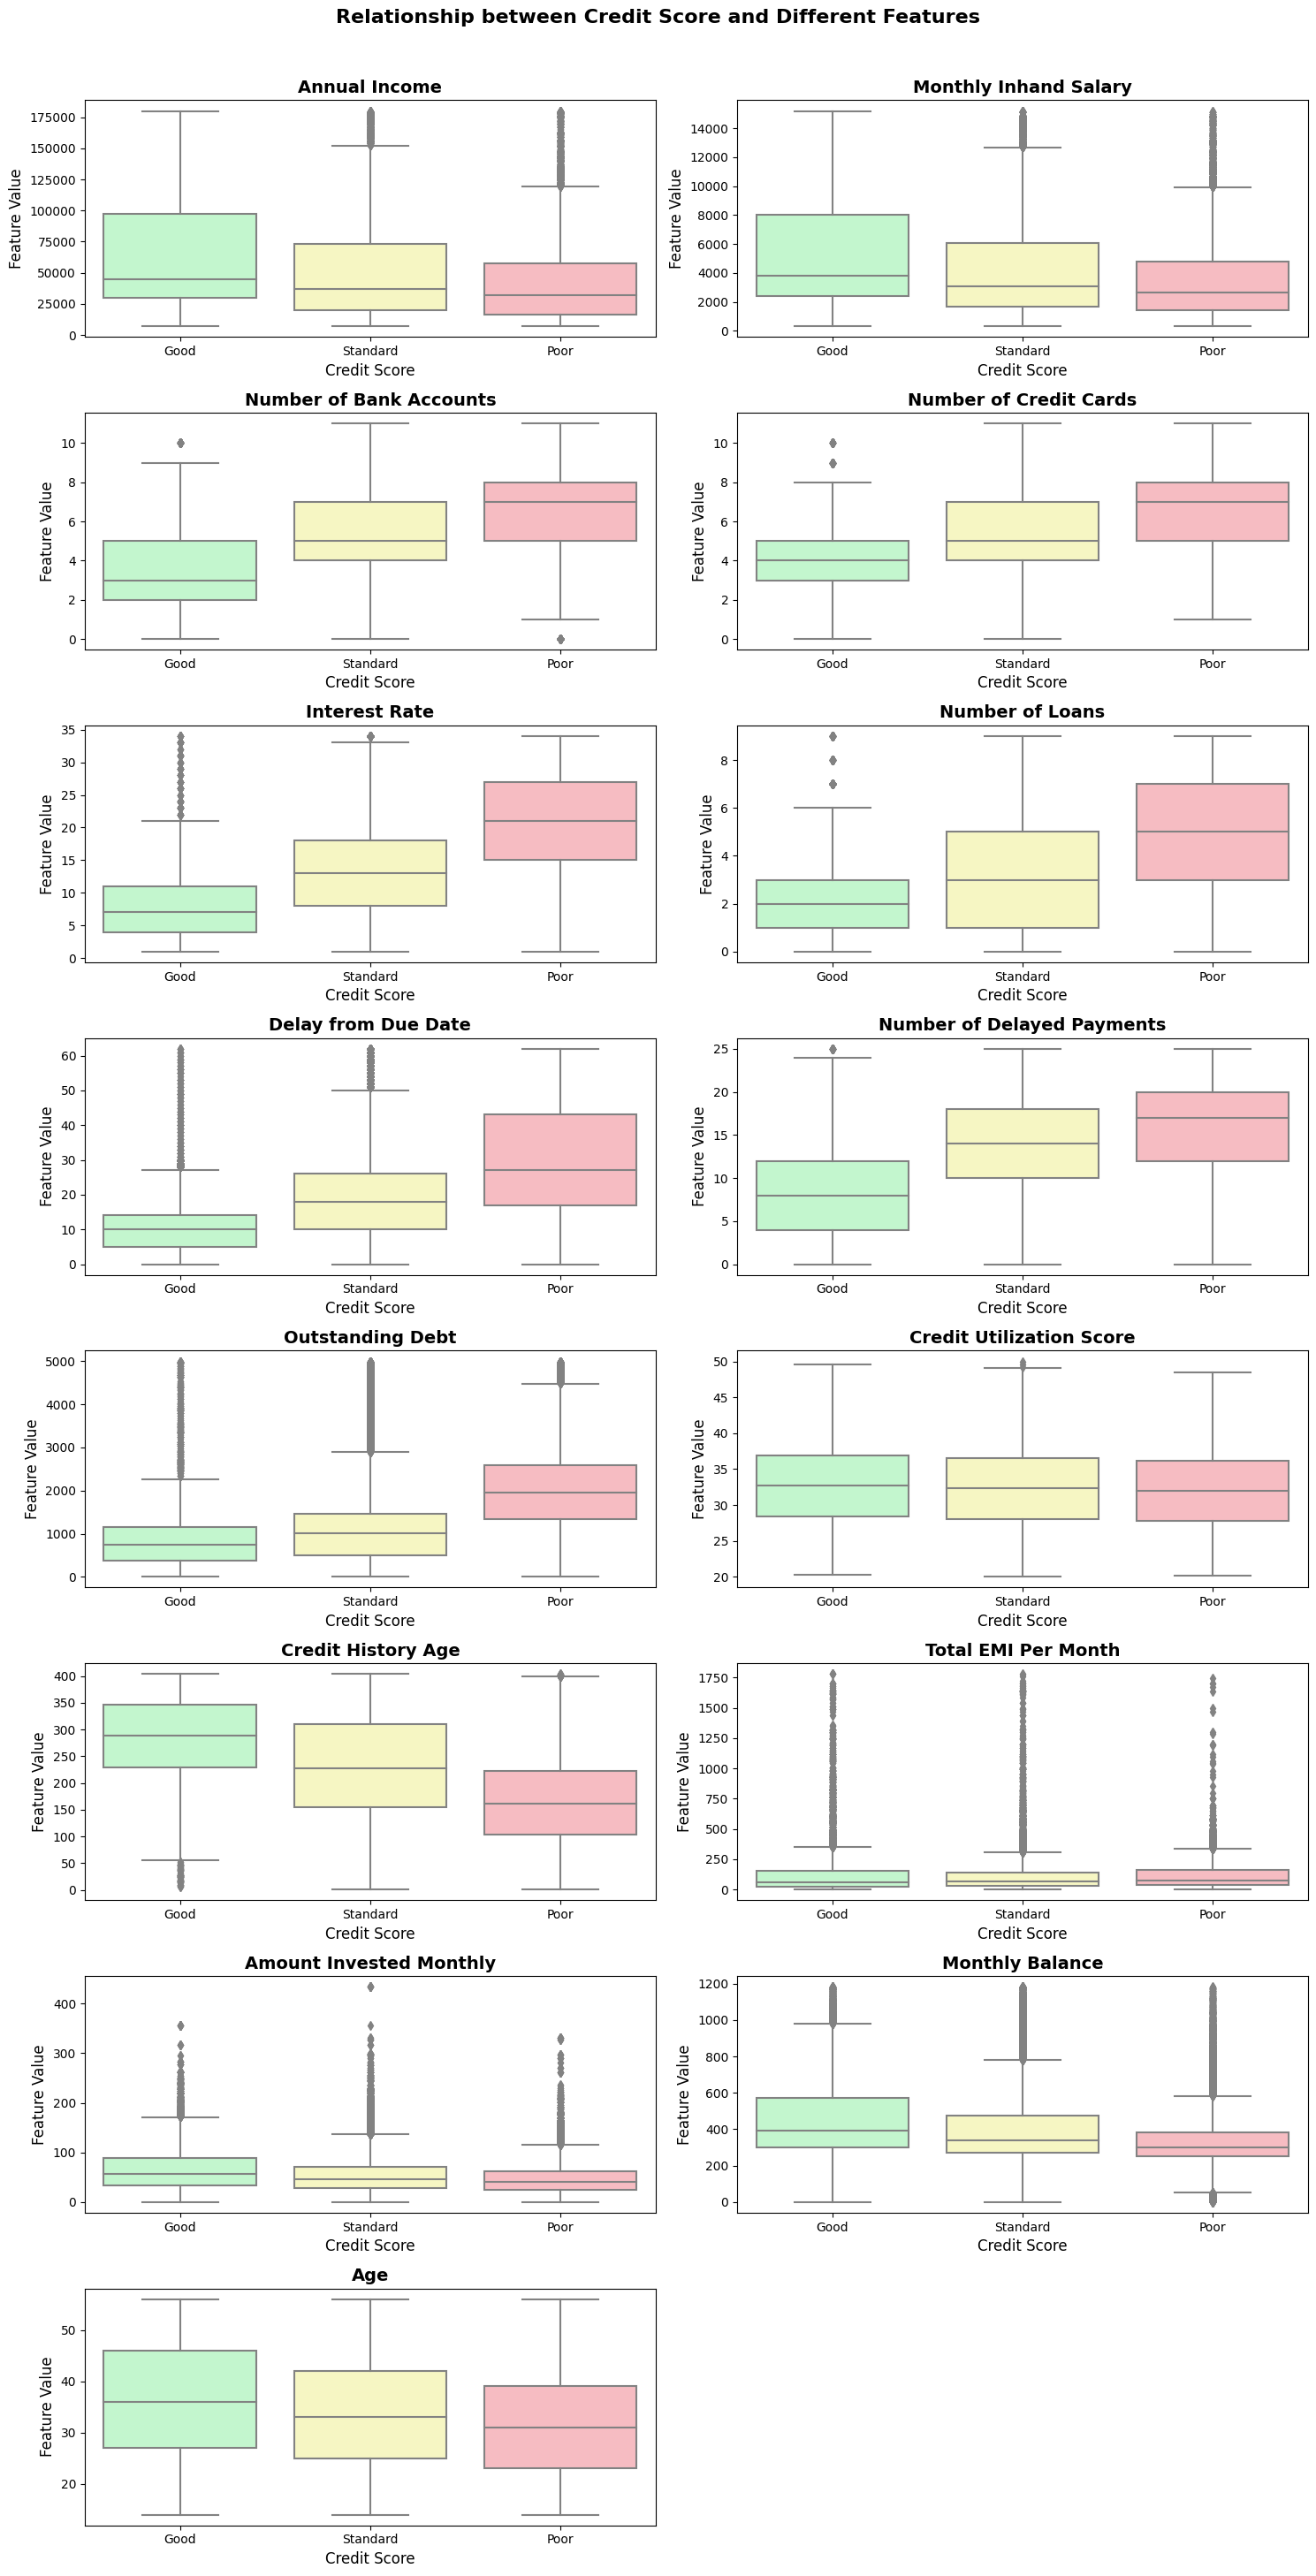

In [85]:
# Create a figure and 2x7 grid of subplots
fig, ax = plt.subplots(8, 2, figsize = (15, 30))

# Flatten the 2D array of the subplots into 1D array
ax = ax.flatten()

# Changing the color of the boxplot
colors = ["#BAFFC9", "#FFFFBA", "#FFB3BA"]
sns.set_palette(sns.color_palette(colors))

# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=df, ax=ax[14])

# Adding labels to the subplots and title to the page
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Add subtitles to subplots
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards',
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

# Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Deleting the empty subplot
ax.flat[-1].set_visible(False)

# Resize the layout of the page
fig.tight_layout(rect=[0, 0.01, 1, 0.97])

# Show the plot
plt.show()

# **Machine Learning Part**

The Credit_Mix column is catergorical, it was to transform into a numerical feature. Doing that will allows us to train a machine learning model for the task of credit score classification.

In [86]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1,
                               "Good": 2,
                               "Bad": 0})

Splitting the data into features and labels by using the features.

In [87]:
x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(df[["Credit_Score"]])

Split the data into the training and tests set. Using Random Forest Classifier as the classification model.

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=42)

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

<ipython-input-88-ac0152116741>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestClassifier()

Finally, the model can make predictions from the user's input according to the features that are used in the model.

In [89]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 2) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 19114.12
Monthly Inhand Salary: 1824.84
Number of Bank Accounts: 3
Number of Credit cards: 4
Interest rate: 3
Number of Loans: 4
Average number of days delayed by the person: 3
Number of delayed payments: 7
Credit Mix (Bad: 0, Standard: 1, Good: 2) : 2
Outstanding Debt: 809.98
Credit History Age: 265
Monthly Balance: 312.49
Predicted Credit Score =  ['Good']
